<a href="https://colab.research.google.com/github/Flaviofrc97/DASCIENSE-MACHINE-LEARNING/blob/main/previs%C3%A3o_de_acidente_vascular_cerebral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0. IMPORTS

In [134]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px;
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

**[Clique aqui para acessar a fonte dos dados: ](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)**

# 0.1. LOAD DATA

In [135]:
risk_avc_df = pd.read_csv('/content/drive/MyDrive/Datasests/avc/healthcare-dataset-stroke-data.csv')

# 1.0 DESCRICAO DOS DADOS

In [136]:
risk_avc_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [137]:
risk_avc_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 1.2. Data Dimesion

In [138]:
print('number of rows: {}'. format(risk_avc_df.shape[0])) #Shape print linhas e colunas de um dataframe
print('number of cols: {}'. format(risk_avc_df.shape[1]))

number of rows: 5110
number of cols: 12


## 1.3. DataTypes

In [139]:
risk_avc_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [140]:
#Coluna id não é relevante
risk_avc_df.drop(['id'], axis=1, inplace=True)

In [141]:
risk_avc_df['age'] = risk_avc_df['age'].astype(int) # Convertendo idade para int
risk_avc_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 1.4. Check NA

In [142]:
risk_avc_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [143]:
risk_avc_df.bmi.fillna(risk_avc_df['bmi'].mean(), inplace=True)
risk_avc_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [144]:
print('Total = ', len(risk_avc_df))
print('Total pessoas com AVC: = ', len( risk_avc_df[risk_avc_df['stroke'] == 1] ))
print('Porcentagem com AVC: =', round((len(risk_avc_df[risk_avc_df['stroke'] == 1]) / len(risk_avc_df)) * 100))
print('Total pessoas sem AVC =', len( risk_avc_df[risk_avc_df['stroke'] == 0] ))
print('Porcentagem sem AVC = ', round((len(risk_avc_df[risk_avc_df['stroke'] == 0]) / len(risk_avc_df)) * 100))

Total =  5110
Total pessoas com AVC: =  249
Porcentagem com AVC: = 5
Total pessoas sem AVC = 4861
Porcentagem sem AVC =  95


In [145]:
risk_avc_df.dtypes

gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## 1.5. Descriptive Statistical

In [146]:
#SEPARANDO VARIAVEIS NUMERICAS E CATEGORICAS PARA POSTERIOR ANALISES

num_attributes = risk_avc_df[['age', 'avg_glucose_level', 'bmi']]
cat_attributes = risk_avc_df[['gender', 'hypertension', 'heart_disease', 'ever_married',
                             'work_type', 'Residence_type', 'smoking_status']]

In [147]:
cat_attributes.sample()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
463,Female,0,0,Yes,Self-employed,Rural,never smoked


In [148]:
num_attributes.sample()

,age,avg_glucose_level,bmi
5061,41,223.78,32.3


# 2.0. PASSO 02 - FEATURE ENGINEERING

In [149]:
df1_avc = risk_avc_df.copy()

In [150]:
df1_avc.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# 3.0. PASSO 03 - ANALISE EXPLORATORIA DOS DADOS

In [151]:
df2_avc = df1_avc.copy()

In [152]:
df2_avc.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


## 3.1. Numerical Variable

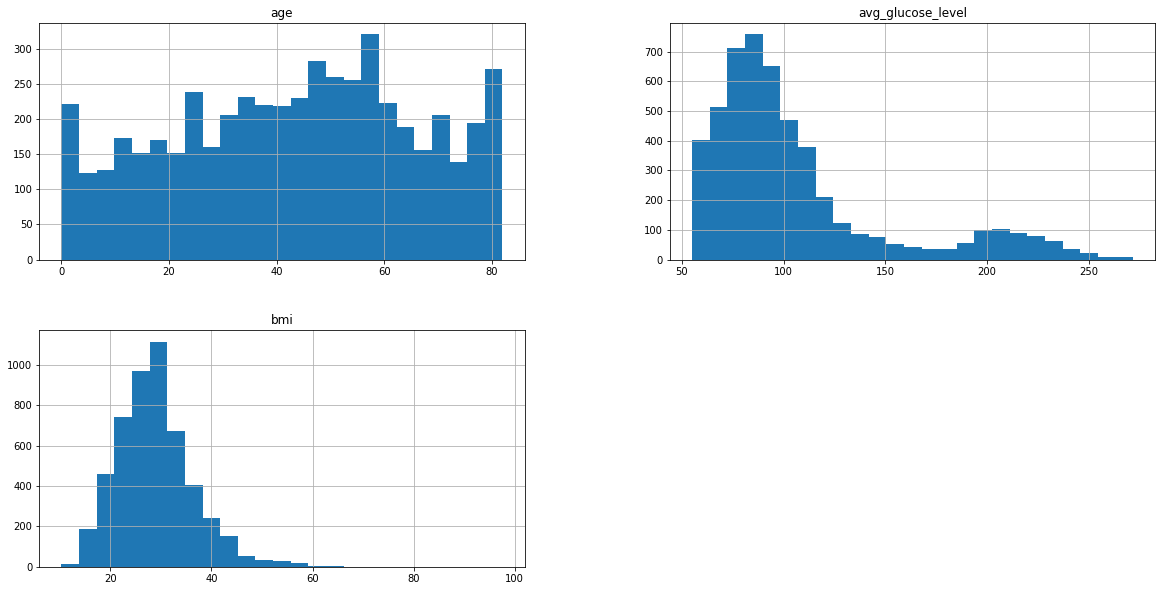

In [153]:
num_attributes.hist(bins=25, figsize=(20,10));

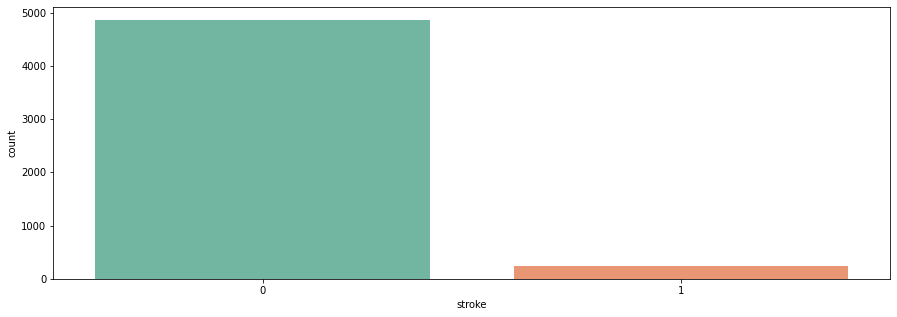

In [154]:
plt.figure(figsize=(15,5))
sns.countplot( x='stroke', palette='Set2', data=risk_avc_df);

## 3.2.  Categorical Variable

## 3.3 ANALISE BIVARIADA

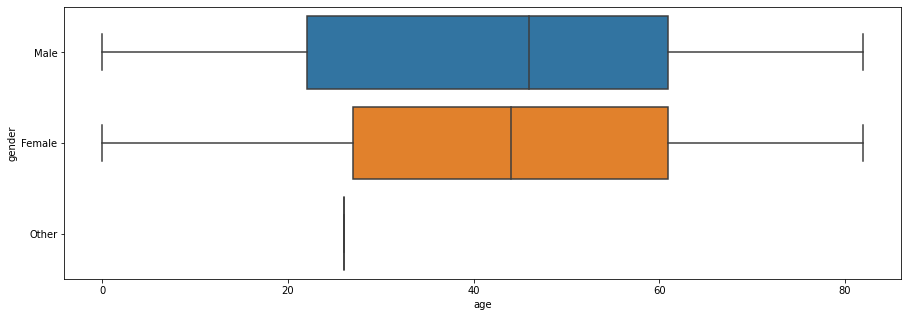

In [155]:
plt.figure(figsize=[15,5])
sns.boxplot(x=num_attributes['age'], y=cat_attributes['gender']);

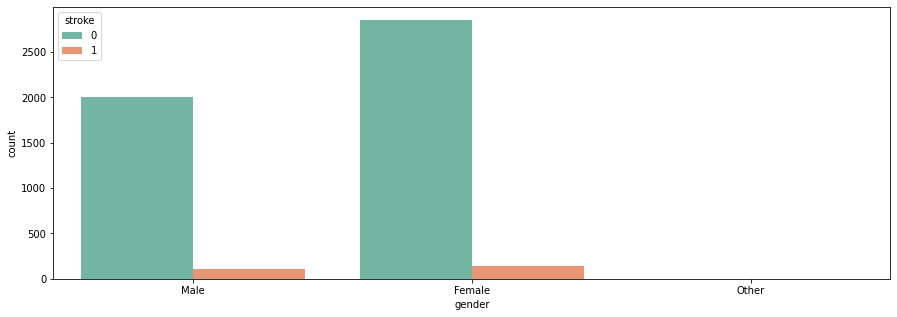

In [156]:
plt.figure(figsize=(15,5))

sns.countplot( x='gender', hue=risk_avc_df['stroke'], palette='Set2', data=cat_attributes);

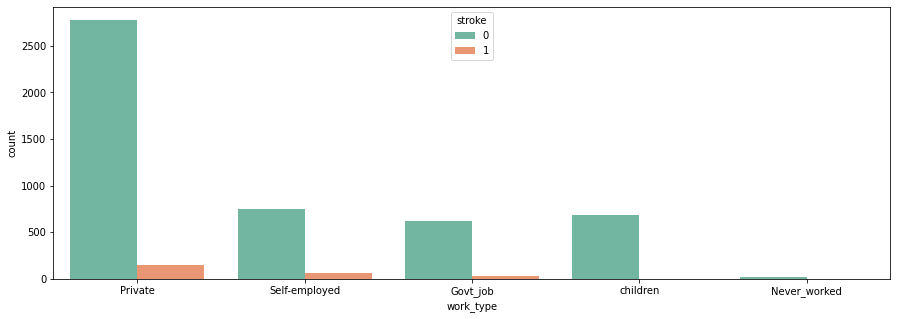

In [157]:
plt.figure(figsize=(15,5))

sns.countplot( x='work_type', hue=risk_avc_df['stroke'], palette='Set2', data=cat_attributes);

**1)** A maior partes das pessoas que tiveram AVC trabalham no setor privado, junstamento pq é onde mais empregam.

**2)** Em seguida vem trabalhadores autonomos

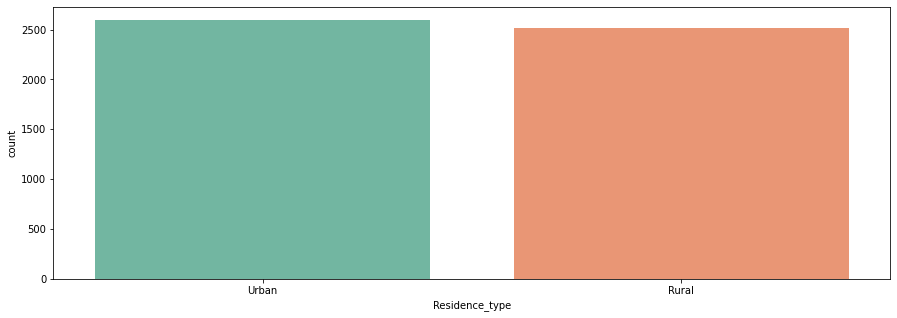

In [158]:
plt.figure(figsize=(15,5))
sns.countplot( x='Residence_type', palette='Set2', data=cat_attributes);

Trabalhadores que residem em locais Urbanos e rurais estão distribuidos quese que igualmente

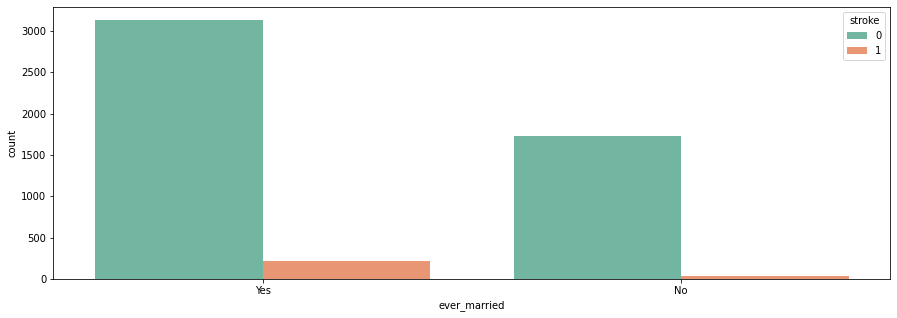

In [159]:
plt.figure(figsize=(15,5))
sns.countplot( x='ever_married', hue=risk_avc_df['stroke'], palette='Set2', data=cat_attributes);

A maioria da pesssoas que tiveram AVC são casadas.

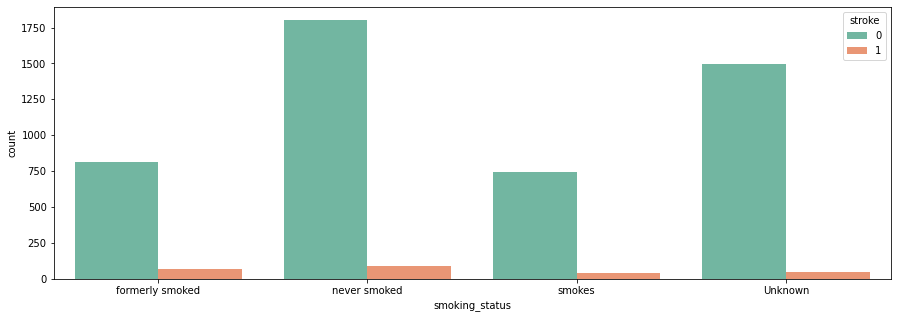

In [160]:
plt.figure(figsize=(15,5))
sns.countplot( x='smoking_status', hue=risk_avc_df['stroke'], palette='Set2', data=cat_attributes);

Pessoas que não fumaram apresentaram maior incidencia de AVC, do que as outras que fumam ou que já fumaram. Porém, há uma grande parte desconcida e que podeira - ou não - alterar este cenário.

#3.4. Analise Multivariada

## 3.4.1 Numerical Attributes


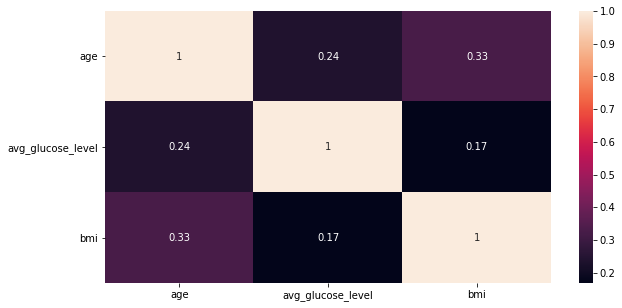

In [161]:
plt.figure(figsize=(10,5))
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

## 3.4.2 Categorical Attributes

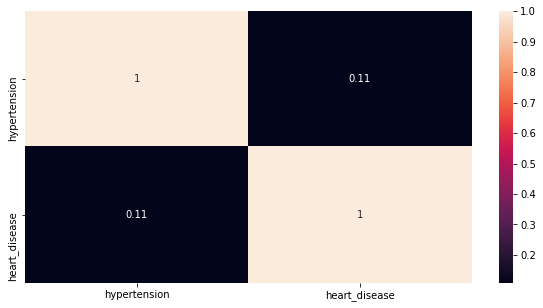

In [162]:
plt.figure(figsize=(10,5))
correlation = cat_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

# **4.0 PRÉ-PRECESSAMENTE DA BASE**

In [163]:
risk_avc_df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


## **4.1. CRIANDO VARIAVEIS DUMMYS**

A utilização da variável dummy irá permitir a captação da diferença do valor esperado entre categorias, ou seja, o coeficiente (Beta) do modelo será o valor médio que determinada categoria representa.

In [164]:
cat_attributes.head(2)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,Male,0,1,Yes,Private,Urban,formerly smoked
1,Female,0,0,Yes,Self-employed,Rural,never smoked


In [165]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
cat_attributes = onehotencoder.fit_transform(cat_attributes).toarray()

In [166]:
cat_attributes = pd.DataFrame(cat_attributes)

In [167]:
cat_attributes.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [168]:
x = pd.concat([cat_attributes, num_attributes], axis=1)

In [169]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,age,avg_glucose_level,bmi
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67,228.69,36.600000
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,61,202.21,28.893237
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,80,105.92,32.500000
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49,171.23,34.400000
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79,174.12,24.000000


## **4.2. COLOCANDO VALORES NA MESMA ESCALA**

A transformação dos seus dados é uma pratica para evitar que seu algoritmo fique enviesado para as variáveis com maior ordem de grandeza.

In [170]:
#Colocando os valores na mesma escala.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [171]:
x

array([[0.        , 1.        , 0.        , ..., 0.81707317, 0.80126489,
        0.30126002],
       [1.        , 0.        , 0.        , ..., 0.74390244, 0.67902317,
        0.21298095],
       [0.        , 1.        , 0.        , ..., 0.97560976, 0.23451205,
        0.25429553],
       ...,
       [1.        , 0.        , 0.        , ..., 0.42682927, 0.12865848,
        0.2325315 ],
       [0.        , 1.        , 0.        , ..., 0.62195122, 0.51320284,
        0.17525773],
       [1.        , 0.        , 0.        , ..., 0.53658537, 0.13922999,
        0.18213058]])

In [172]:
y = risk_avc_df['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

## **4.3. SEPARANDO BASE TRAIN/TEST**

In [173]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.25)

## **4.3.1. TESTANDO UNDERSIMPLING**

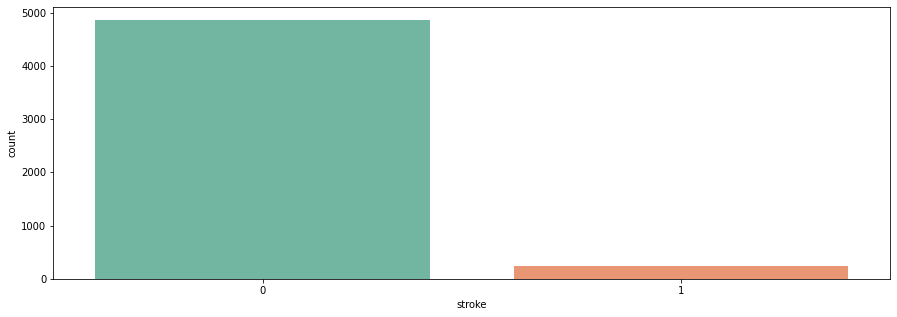

In [174]:
plt.figure(figsize=(15,5))
sns.countplot( x='stroke', palette='Set2', data=risk_avc_df);

Como podemos ver no gráfico, a base esta desbalanceada.

1    187
0    187
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



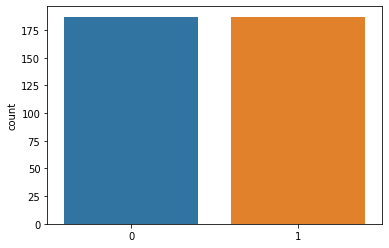

In [175]:
# usar técnica under-sampling
rus = RandomUnderSampler()
x_res, y_res = rus.fit_sample(x_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())
 
# plotar a nova distribuição de classes
sns.countplot(y_res);

# **5.0 REGRESSÃO LINEAR DEPOIS DO UNDER-SAMPLING**

[Significados das métricas](https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/)

In [176]:
model_res = LogisticRegression()

In [177]:
model_res.fit(x_res, y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Acurácia: 0.7300

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9932    0.7212    0.8356      1216
           1     0.1418    0.9032    0.2451        62

    accuracy                         0.7300      1278
   macro avg     0.5675    0.8122    0.5404      1278
weighted avg     0.9519    0.7300    0.8070      1278



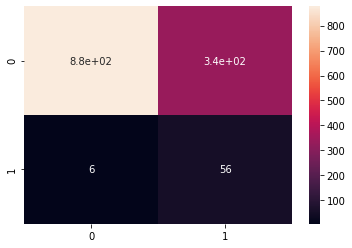

In [178]:
# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(x_test)
y_proba_res = model_res.predict_proba(x_test)

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))
 
# plotar a matrix de confusão
cm = confusion_matrix(y_test, y_pred_res)
sns.heatmap(cm, annot=True);
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))

# **6. REGRESSÃO LINEAR ANTES DO UNDER-SAMPLING**

In [179]:
lr = LogisticRegression()

In [180]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
y_lr_predictic = lr.predict(x_test)

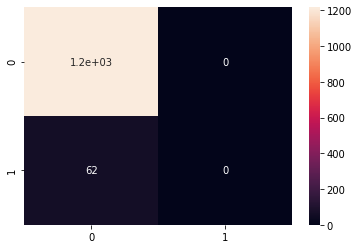

In [182]:
#Gerando matrix de confusao
cm = confusion_matrix(y_test, y_lr_predictic)
sns.heatmap(cm, annot=True);

In [183]:
print(classification_report(y_test, y_lr_predictic)) #Visualiza todas as metricas juntas

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

